In [7]:
# Import main packages 
from tilepy.include.ObservationScheduler import GetSchedule
from tilepy.include.PointingTools import ObservationParameters, NextWindowTools, getdate
import time
import argparse
import os
from pathlib import Path


In [8]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Set of inputs needed to run the code

In [9]:
# Type of followup, options: gbm, gbmpng or gw
alertType = 'gw'

# The url to the FITS file with the sky localization, e.g.for GW https://urlpath/Bayestar.fits.gz'
# You can use https://gracedb.ligo.org/api/superevents/MS230802n/files/bayestar.multiorder.fits,0
#skymap =  'https://gracedb.ligo.org/api/superevents/S231206cc/files/bayestar.multiorder.fits,1'
#skymap = 'https://gracedb.ligo.org/api/superevents/S240413p/files/bayestar.multiorder.fits,1'
#skymap = 'https://dcc.ligo.org/public/0119/P1500071/007/927563_lalinference.fits.gz'
skymap = '../paperplots/927563_lalinference.fits.gz'

# Date and time of the event in format YYYY-MM-DD HH:MM:SS. You can use 2023-07-15 14:30:10 for the example .fits file
#obsTime = getdate("2023-12-06  23:39:01")
#obsTime = getdate("2024-04-13  02:33:01")
obsTime = getdate("2023-03-15 20:51:47")

# Path to the input datasets (where galaxy cat should be for GW case)
datasetDir = '../../tilepy/dataset/'

# Path to the output folder
outDir = './output'

# Config file for the tiling scheduling
cfgFile = '../config/FollowupParameters_CTAON.ini'

# Galaxy catalog name (if no catalog is given, the approach will be 2D). Path to th file is defined in datasetDir variable
galcatName = 'Gladeplus.h5'

# Tiles already observed
pointingsFile = None

# Limit on skyloc to perform a followup
locCut = None

In [10]:
# Create forder for output
if not os.path.exists(outDir):
    os.makedirs(outDir)

In [11]:
#Parse the parameters 
obspar = ObservationParameters()
obspar.add_parsed_args(skymap,obsTime,datasetDir,galcatName,outDir,pointingsFile,alertType,locCut)
obspar.from_configfile(cfgFile)

### Run the scheduling

Is the hotspot in the galactic plane? False
Starting the 3D pointing calculation with the following parameters

Filename:  927563_lalinference
Date:  2023-03-15 20:51:47
Previous pointings:  None
Catalog:  ../../tilepy/dataset/Gladeplus.h5
Dataset:  ../../tilepy/dataset/
Output:  ./output/927563_lalinference

============== Main parsed observation parameters ==============  
Observatory Name: CTAO-N
Observatory: 28.75 deg
Observatory: -17.5 deg
Observatory: 2200.0 m
Max zenith: 70
Using Greytime is: False
FOV: 2.0
Max runs: 20
Duration: 15
High Resolution NSIDE: 512
Low Resolution NSIDE: 128
The strategy is (3D, integrated, mangrove=False)
The level of details is (doPlot=True, doRank = True)

Loading galaxy catalogue from ../../tilepy/dataset/Gladeplus.h5
Loading map from  ../paperplots/927563_lalinference.fits.gz
Loading LVC HEALPix map from file: ../paperplots/927563_lalinference.fits.gz
Event has triggered  Non specified  => distance = 89.66  +- 19.29  Mpc
Found a 3D reconstruction


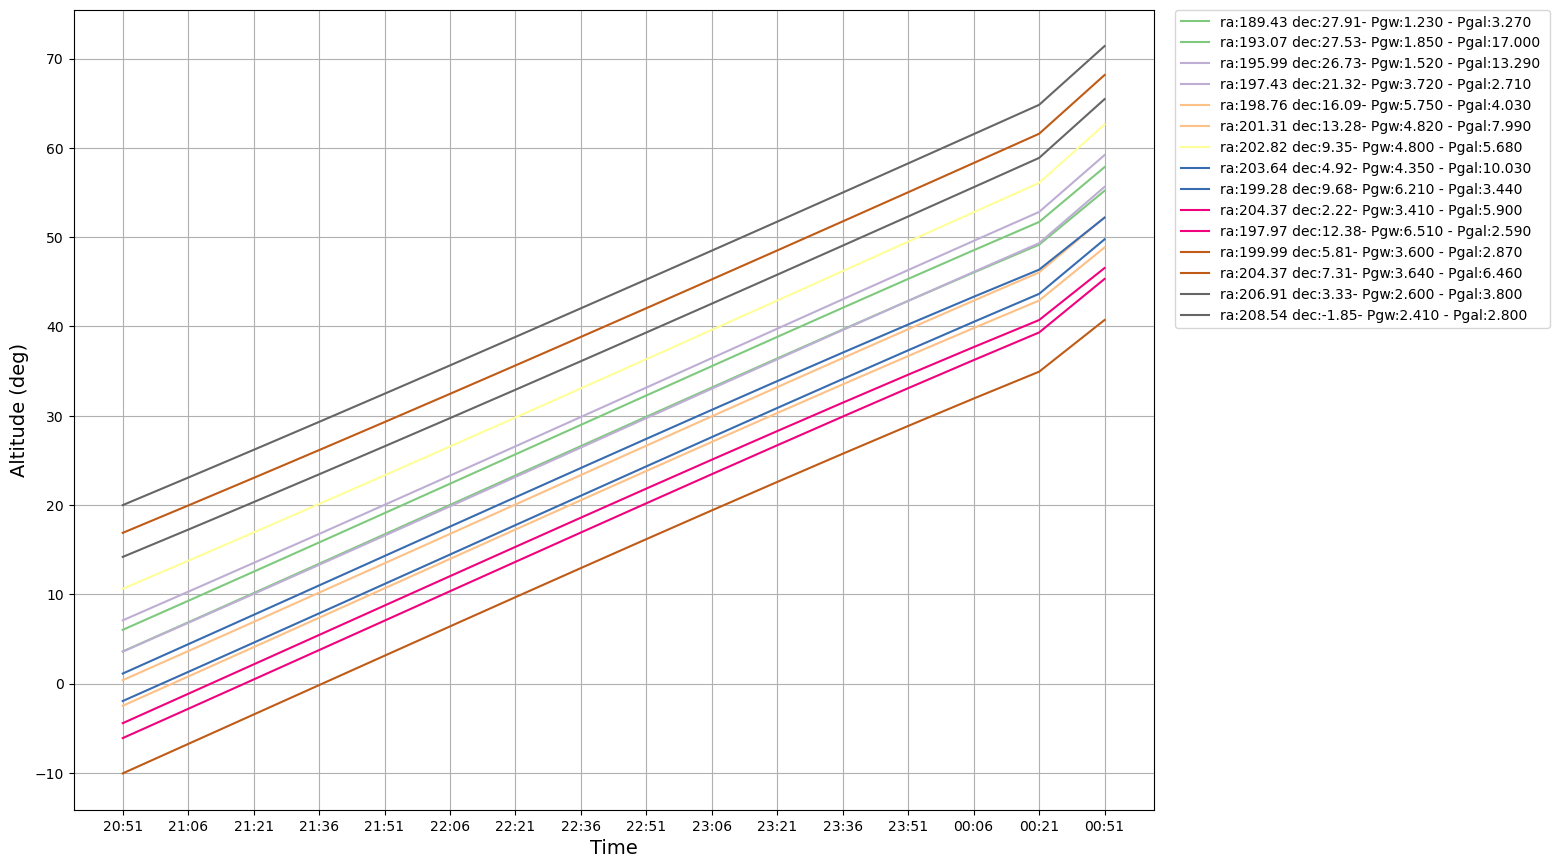

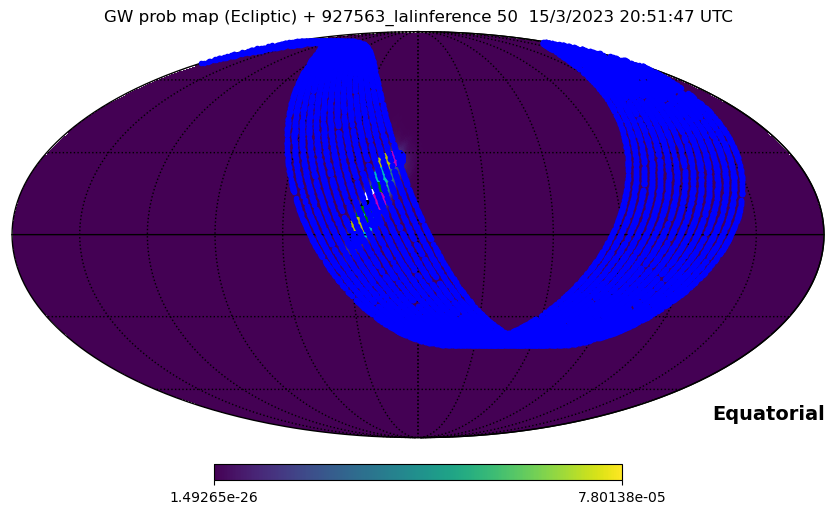

In [12]:
# Run the scheduler
GetSchedule(obspar)